# 1. Cleaning

In [291]:
import os

os.chdir("C:/Users/shun/bahasa_alami/UTS/dataset")
base = "DGM1vFVzvfy_Comments.csv"


# Buka file input file dan baca baris per baris
input_stream = open(base, "r", encoding="utf8")
input_stream_lines = input_stream.readlines()
input_stream.close()

In [292]:
text = []
for line in input_stream_lines[1:]:  # Lewati baris pertama (header)
    columns = line.split(";")
    if len(columns) >= 4:
        text.append(columns[3])  # Kolom "text" ada di indeks 3
    else:
        print(f"Baris tidak lengkap: {line.strip()}")

Baris tidak lengkap: 
Baris tidak lengkap: Gua comment balik malah ga terima, lu sendiri ngatain orang “sok sok an mau kabur duit aja masih minta orang tua”.
Baris tidak lengkap: 
Baris tidak lengkap: Kocak lu 🫵🏻🤓";"4516000755";"_tepann"
Baris tidak lengkap: Kelihatan pengganggurannya 😳";"4516000755";"_tepann"
Baris tidak lengkap: هُوَ الَّذِيْ جَعَلَ لَكُمُ الْاَرْضَ ذَلُوْلًا فَامْشُوْا فِيْ مَنَاكِبِهَا وَكُلُوْا مِنْ رِّزْقِهٖۗ وَاِلَيْهِ النُّشُوْرُ
Baris tidak lengkap: “Dialah yang menjadikan bumi untuk kamu yang mudah dijelajahi, maka jelajahilah di segala penjurunya dan makanlah sebagian dari rezeki-Nya. Dan hanya kepada-Nyalah kamu (kembali setelah) dibangkitkan.”";"175407787";"bhaktidesta"
Baris tidak lengkap: 
Baris tidak lengkap: Kita terus doain negeri ini ya, kawan. Cuma itu senjata kita kali ini. Dan teruslah bersuara.";"72254935515";"tulangpunggungk"
Baris tidak lengkap: Yg kaya gini kok bisa sih jadi menteri😭😭";"1738021223";"alifaflan00"
Baris tidak lengkap: pada merek

In [293]:
# Cek panjang input dan print sampel
print(len(input_stream_lines), len(text))
print("\ninput_stream_lines: \n", input_stream_lines[:5], "\n\ntext: \n", text[:5])

21307 21103

input_stream_lines: 
 ['\ufeff"comment_id";"created_at";"profile_pic_url";"text";"user_id";"username"\n', '"17901650760110276";"1741033170";"https://instagram.fbpn2-1.fna.fbcdn.net/v/t51.2885-19/409214471_1428771261357130_7960639991080466732_n.jpg?stp=dst-jpg_s150x150_tt6&_nc_ht=instagram.fbpn2-1.fna.fbcdn.net&_nc_cat=110&_nc_oc=Q6cZ2QHLBu8xE5eAen0Ph_4-M4NRm47V0RI93LBL-MURciPkTWVpHNIbIlyqQ_1Zmsw0bhI&_nc_ohc=kkl5vBMQabMQ7kNvwEjWPUF&_nc_gid=33lpoeZnQv2lqWmoduMYfQ&edm=AI-cjbYBAAAA&ccb=7-5&oh=00_AfLkBdttxgjLlyHEXdFECU2Iafq2_MaatC7n8B7v2zRzmg&oe=6834EB03&_nc_sid=0985b0";"Orang orang pada mikir kalau pajak itu cuma setahun sekali bayarnya . Padahal makan di resto , beli booking hotel , tiket konser , dll itu juga bayar pajak coook . Penawaran proyek 4,5jt aja ada PPN s uu";"1970898125";"ay.rudi"\n', '"17959654193866143";"1741034045";"https://instagram.fbpn2-1.fna.fbcdn.net/v/t51.2885-19/495749715_17932694409033652_2318935567602352027_n.jpg?stp=dst-jpg_s150x150_tt6&_nc_ht=instagr

In [299]:
import re

# Fungsi pembersihan teks
def clean_text(line):
    # Tahap-1: Hapus karakter non-ASCII
    res = re.sub(r'[^\x00-\x7F]+', ' ', line)
    # Tahap-2: Hapus URLs
    res = re.sub(r'http[s]?://.[a-zA-Z0-9./_?=%&#-+!]+', ' ', res)
    res = re.sub(r'pic.twitter.com?.[a-zA-Z0-9./_?=%&#-+!]+', ' ', res)
    # Tahap-3: Hapus mentions
    res = re.sub(r'@([\w]+)', ' ', res)
    # Tahap-4: Hapus tagar
    res = re.sub(r'#([\w]+)', ' ', res)
    # Tahap-5: Hapus simbol
    res = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,./]', ' ', res)
    # Tahap-6: Hapus angka
    res = re.sub(r'[0-9]+', '', res)
    # Tahap-7: Koreksi duplikasi tiga karakter beruntun atau lebih
    res = re.sub(r'([a-zA-Z])\1\1', '\\1', res)
    # Tahap-8: Ubah spasi ganda menjadi satu spasi
    res = re.sub(' +', ' ', res)
    # Tahap-9: Hapus spasi di awal dan akhir kalimat
    res = re.sub(r'^[ ]|[ ]$', '', res)
    # Tahap-10: Konversi ke huruf kecil
    res = res.lower()
    return res

    #menghapus 
    res=re.sub("gacoan","",res)
    res=re.sub("mall","",res)
    res=re.sub("rakyat","",res)
    res=re.sub("orang-orang","",res)
    res=re.sub("pada","",res)
    res=re.sub("kalau","",res)
    res=re.sub("itu","",res)
    res=re.sub("cuma","",res)
    res=re.sub("sekali","",res)
    res=re.sub("cepat","",res)
    res=re.sub("sembuh","",res)
    res=re.sub("semoga","",res)
    res=re.sub("lagi","",res)
    res=re.sub("juga","",res)
    res=re.sub("kir","",res)
    res=re.sub("rem","",res)
    res=re.sub("blong","",res)

In [300]:
# Bersihkan teks dan tulis ke file keluaran
output_path = "C:/Users/shun/bahasa_alami/UTS/output/kaburajadulu-clean.txt"
with open(output_path, 'w') as f:
    for line in text:
        cleaned_text = clean_text(line)
        f.write(cleaned_text + "\n")

print(f"Proses selesai. Teks yang telah dibersihkan disimpan di {output_path}")

Proses selesai. Teks yang telah dibersihkan disimpan di C:/Users/shun/bahasa_alami/UTS/output/kaburajadulu-clean.txt


# 2. Stopword Removeral

Stopwords adalah kata-kata yang sering muncul dalam bahasa, tapi tidak membawa makna penting dalam konteks analisis, misalnya:

Dalam Bahasa Indonesia:
yang, dan, di, ke, dari, ini, itu, adalah, dengan, untuk...

In [301]:
import json

# Tentukan jalur kamus slang word di Kaggle
kamus_path = "C:/Users/shun/bahasa_alami/UTS/tools/_json_colloquial-indonesian-lexicon.txt"

# Baca file kamus
with open(kamus_path, "r", encoding="utf8") as f:
    data = f.read()
# Rekonstruksi data sebagai dictionary
lookp_dict = json.loads(data)

In [304]:
import os

# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
os.chdir("C:/Users/shun/bahasa_alami/UTS/output")
base = "kaburajadulu-clean.txt"

# Buka file input file dan baca baris per baris
input_stream = open(base, 'r')
input_stream_lines = input_stream.readlines()
input_stream.close()

In [311]:
# Memisahkan teks dan label dari input
text = []
for line in input_stream_lines:
    text.append(line.split("\t")[0])
    
    # Print sampel terakhir
print("\ninput_stream_lines: \n", input_stream_lines[10],
      "\n\ntext: \n", text[10])


input_stream_lines: 
 iya dong emang elu udah di brainwashed sama pejabrut yang bahkan ga peduli sama hidup lu as rakyat jelata
 

text: 
 iya dong emang elu udah di brainwashed sama pejabrut yang bahkan ga peduli sama hidup lu as rakyat jelata



In [312]:
# Extract just the filename without the directory path
filename = os.path.basename(base)
# Create the output filename by appending '-slang.txt'
output_filename = os.path.splitext(filename)[0] + '-slang.txt'
# Set the output path in the writable /kaggle/working/ directory
output = os.path.join('C:/Users/shun/bahasa_alami/UTS/output', output_filename)

# Write the output file
with open(output, 'w', encoding='utf8') as f:
    # Replace slang words using the lookup dictionary
    for line in text:
        res = " ".join(lookp_dict.get(ele, ele) for ele in line.split())
        # Write each corrected line to the output file
        f.write(str(res) + '\n')

print(f"Output file saved to: {output}")

Output file saved to: C:/Users/shun/bahasa_alami/UTS/output\kaburajadulu-clean-slang-slang.txt


In [313]:
base = output

# Buka file input file dan membacanya 'kata per kata' di tiap baris
input_stream = open(base, 'r')
lines = input_stream.read().splitlines()
input_stream.close()

# Menggunakan Wahid ID-Stopwords
# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
with open('C:/Users/shun/bahasa_alami/UTS/tools/id.stopwords.02.01.2016.txt') as f:
    custom_stop = f.read().splitlines()

In [314]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# memanfaatkan modul stopwords NLTK untuk menggunakan stopwords kustom
stopwords = stopwords.words('indonesian')
stopwords.clear()
stopwords.extend(custom_stop)
print(stopwords[:3])

['ada', 'adalah', 'adanya']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [315]:
# Buat file output
output = os.path.splitext(base)[0]+'-stop.txt'

count=0
with open(output, 'w') as f:
    # Menghapus stopword yang ditemukan di setiap baris
    for line in lines:
        s = ""
        words = line.split()
        for w in words:
            if not w in stopwords:
                s+=str(w)+" "
        res = s

        # Tulis setiap baris yang sudah dikoreksi ke file output
        # dan mengembalikan label awal
        f.write(str(res+"\n"))
        count+=1

# 3. Labeling

In [316]:
import os

# Membaca data yang sudah dibersihkan dari karakter yang tidak diperlukan serta dari daftar kata tak baku dan stop words
# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
os.chdir("C:/Users/shun/bahasa_alami/UTS/output")
base = "kaburajadulu-clean-slang-stop.txt"

In [317]:
from collections import OrderedDict


input_stream = open(base, "r", encoding="utf8")
text = input_stream.readlines()
input_stream.close()
print("before:", len(text))

# menghapus duplikasi kalimat dengan mengonversinya ke 'ordered dictionary'
newtext = list(OrderedDict.fromkeys(text))
print("after:", len(newtext))

before: 21221
after: 15559


In [318]:
print(text[:2],)
print(newtext[:2])

['orang orang mikir pajak setahun bayarnya makan resto beli booking hotel tiket konser dll bayar pajak cok penawaran proyek juta ppn si uu \n', 'sekolah lu pikir pajak kendaraan lu beli gacoan bayar pajak \n']
['orang orang mikir pajak setahun bayarnya makan resto beli booking hotel tiket konser dll bayar pajak cok penawaran proyek juta ppn si uu \n', 'sekolah lu pikir pajak kendaraan lu beli gacoan bayar pajak \n']


In [319]:
import os

# Extract just the filename from the base path
filename = os.path.basename(base)
# Create the output filename by appending '-dup.txt'
output_filename = os.path.splitext(filename)[0] + '-dup.txt'
# Set the output path in the writable /kaggle/working/ directory
output = os.path.join('C:/Users/shun/bahasa_alami/UTS/output', output_filename)

# Write the cleaned text to the output file
with open(output, 'w', encoding='utf8') as f:
    for line in newtext:
        f.write(str(line) + '\n')  # Add newline for each line

print(f"Output file saved to: {output}")

Output file saved to: C:/Users/shun/bahasa_alami/UTS/output\kaburajadulu-clean-slang-stop-dup.txt


In [320]:
import pandas as pd

# Kita akan menggunakan kolom teks saja di tahap ini, tanpa kolom label
Corpus = pd.read_csv(output, encoding='latin-1', header=None, sep="\t", names=['text'], usecols=['text'], dtype=str)

# # ALTERNATIF
# # Memisahkan teks dan label dengan membuat DataFrame dari list 'ordered dict'
# df = pd.DataFrame(newtext, columns=['text'])
# df[['text','label']] = df['text'].str.split('\t',expand=True)
# df['label'] = df['label'].str.split('\n',expand=True)

# # 3.1 proses labeling menggunakan inset dan senti

In [321]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import json
import reprlib

# Memanfaatkan nltk VADER untuk menggunakan leksikon kustom
sia1A, sia1B, sia2 = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
# membersihkan leksikon VADER default
sia1A.lexicon.clear()
sia1B.lexicon.clear()
sia2.lexicon.clear()

# Membaca leksikon InSet
# Leksikon InSet lexicon dibagi menjadi dua, yakni polaritas negatif dan polaritas positif;
# kita akan menggunakan nilai compound saja untuk memberi label pada suatu kalimat
with open('C:/Users/shun/bahasa_alami/UTS/tools/_json_inset-neg.txt') as f:
    data1A = f.read()
with open('C:/Users/shun/bahasa_alami/UTS/tools/_json_inset-pos.txt') as f:
    data1B = f.read()

# Membaca leksikon sentiwords_id
with open('C:/Users/shun/bahasa_alami/UTS/tools/_json_sentiwords_id.txt') as f:
    data2 = f.read()

# Mengubah leksikon sebagai dictionary
insetNeg = json.loads(data1A)
insetPos = json.loads(data1B)
senti = json.loads(data2)

# Update leksikon VADER yang sudah 'dimodifikasi'
sia1A.lexicon.update(insetNeg)
sia1B.lexicon.update(insetPos)
sia2.lexicon.update(senti)

print(reprlib.repr(sia1A.lexicon))
print(reprlib.repr(sia1B.lexicon))
print(reprlib.repr(sia2.lexicon))

{'(barang) bekas': -4, '(olahraga) bokser': -5, '(tua) uzur': -3, 'Anda': -4, ...}
{'(hujan) gerimis': 1, '(warna) dadu': 3, 'Ahad': 3, 'Sri paduka': 4, ...}
{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [322]:
sample = "maju tak gentar menuju indonesia jaya"
print("insetNeg: ", sia1A.polarity_scores(sample))
print("insetPos: ", sia1B.polarity_scores(sample))
print("insetCpdSum: 'compound':", sia1A.polarity_scores(sample)["compound"] + sia1B.polarity_scores(sample)["compound"])

print("senti\t: ", sia2.polarity_scores(sample))
sentiidx=sia2.polarity_scores(sample)
print(sentiidx['compound'])

insetNeg:  {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9001}
insetPos:  {'neg': 0.0, 'neu': 0.364, 'pos': 0.636, 'compound': 0.7906}
insetCpdSum: 'compound': -0.10950000000000004
senti	:  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.7184}
0.7184


In [323]:
os.chdir("C:/Users/shun/bahasa_alami/UTS/output")
base = "kaburajadulu-clean-slang-stop-dup.txt"

# Buka file input file dan baca baris per baris
input_stream = open(base, 'r')
input_stream_lines = input_stream.readlines()
input_stream.close()

In [324]:
# fungsi penentuan label

def is_positive_inset(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia1A.polarity_scores(tweet)["compound"] + sia1B.polarity_scores(tweet)["compound"] >= 0.05

def is_neutral_inset(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return (sia1A.polarity_scores(tweet)["compound"] + sia1B.polarity_scores(tweet)["compound"] < 0.05) and (sia1A.polarity_scores(tweet)["compound"] + sia1B.polarity_scores(tweet)["compound"] > -0.05)

def is_positive_senti(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return sia2.polarity_scores(tweet)["compound"] >= 0.05

def is_neutral_senti(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return (sia2.polarity_scores(tweet)["compound"] < 0.05) and (sia2.polarity_scores(tweet)["compound"] > -0.05)


In [325]:
import os # Ensure os is imported if not already in this specific cell
tweets = Corpus["text"] # This line should be fine if Corpus is defined

# Define the base input file name (assuming 'base' from cell 30 is still relevant)
# os.chdir("/kaggle/input/comment-insta-kaburajadulu") # This was set in cell 30
# base_filename = "kaburajadulu-clean-slang-stop-dup.txt" # From cell 30

# Corrected output path for the first file
output_filename_inset = os.path.splitext(base)[0] + '-lb-inset.txt' # 'base' is from cell 30
output_path_inset = os.path.join('C:/Users/shun/bahasa_alami/UTS/output', output_filename_inset)

count = 0
posIn = 0
neuIn = 0
negIn = 0
with open(output_path_inset, 'w') as f: # Use the corrected path
    for tweet in tweets:
        if is_positive_inset(tweet) == True:
            label = "pos"
            posIn += 1
        elif is_neutral_inset(tweet) == True:
            label = "neu"
            neuIn += 1
        else:
            label = "neg"
            negIn += 1
            
        InsetNeg = sia1A.polarity_scores(tweet)
        c1 = str(InsetNeg["compound"])
        neg1 = str(InsetNeg["neg"])
        neu1 = str(InsetNeg["neu"])
        pos1 = str(InsetNeg["pos"]) 
        
        InsetPos = sia1B.polarity_scores(tweet)
        c2 = str(InsetPos["compound"])
        neg2 = str(InsetPos["neg"])
        neu2 = str(InsetPos["neu"])
        pos2 = str(InsetPos["pos"]) 
        
        SumCom = str(sia1A.polarity_scores(tweet)["compound"] + sia1B.polarity_scores(tweet)["compound"])
        
        # Ensure tweet is a string before concatenation if it's not already
        f.write(str(tweet) + "\t" + neg1 + "\t" + neu1 + "\t" + pos1 + "\t" + c1 + "\t" + neg2 + "\t" + neu2 + "\t" + pos2 + "\t" + c2 + "\t" + SumCom + "\t" + label + "\n")
        
print("Inset:\n")
print("Positif:", posIn, " Netral:", neuIn, " Negatif:", negIn, "\\n")
        
# Corrected output path for the second file
output_filename_senti = os.path.splitext(base)[0] + '-lb-senti.txt' # 'base' is from cell 30
output_path_senti = os.path.join('C:/Users/shun/bahasa_alami/UTS/output', output_filename_senti)

posSen = 0
neuSen = 0
negSen = 0
with open(output_path_senti, 'w') as f: # Use the corrected path
    for tweet in tweets:
        if is_positive_senti(tweet) == True:
            label = "pos"
            posSen += 1
        elif is_neutral_senti(tweet) == True:
            label = "neu"
            neuSen += 1
        else:
            label = "neg"
            negSen += 1
        sentiid = sia2.polarity_scores(tweet)
        c = str(sentiid["compound"])
        neg = str(sentiid["neg"])
        neu = str(sentiid["neu"])
        pos = str(sentiid["pos"])
        # Ensure tweet is a string before concatenation
        f.write(str(tweet) + "\t" + neg + "\t" + neu + "\t" + pos + "\t" + c + "\t" + label + "\n")

print("SentiWords:\\n")
print("Positif:", posSen, " Netral:", neuSen, " Negatif:", negSen)

print("Inset:\n")
print("Positif:", posIn, " Netral:", neuIn, " Negatif:", negIn, "\\n")
        
# Corrected output path for the second file
output_filename_ai = 'chat_gpt.txt' # 'base' is from cell 30


Inset:

Positif: 3375  Netral: 5592  Negatif: 6591 \n
SentiWords:\n
Positif: 2239  Netral: 9098  Negatif: 4221
Inset:

Positif: 3375  Netral: 5592  Negatif: 6591 \n


# 4. KLASIFIKASI

In [229]:
# import pandas as pd
# import numpy as np
# from nltk.tokenize import word_tokenize
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn import model_selection, svm
# from sklearn.metrics import accuracy_score

In [230]:
# np.random.seed(500)

In [231]:
# clf = svm.SVC(kernel='linear', random_state=42)

In [326]:
import os

# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
os.chdir('C:/Users/shun/bahasa_alami/UTS/output')
lb_inset = 'kaburajadulu-clean-slang-stop-dup-lb-inset.txt'
lb_Ai = 'chat_gpt.txt'

LabelInset = pd.read_csv(lb_inset, encoding='latin-1', header=None, dtype=str,sep="\t")
LabelInset.columns = ['tweet', 'neg1', 'neu1', 'pos1', 'c1','neg2', 'neu2', 'pos2', 'c2','sumcom', 'label']

LabelAi = pd.read_csv(lb_Ai, encoding='latin-1', header=None, dtype=str,sep="\t")
LabelAi.columns = ['tweet','label']

# Tampilkan 5 label pertama
print(LabelInset['label'].head())
print(LabelAi['label'].head())

0    neu
1    neg
2    neu
3    neg
4    neu
Name: label, dtype: object
0    neg
1    neg
2    neg
3    neg
4    neg
Name: label, dtype: object


In [327]:
neg1, pos1,neu1 = (LabelInset['label'][LabelInset['label']=='neg']).count(), (LabelInset['label'][LabelInset['label']=='pos']).count(), (LabelInset['label'][LabelInset['label']=='neu']).count()
print('neg:', neg1, '(', '{0:.2f}'.format(neg1/(neg1+pos1+neu1)*100), '%)','\t', 'pos:', pos1, '(', '{0:.2f}'.format(pos1/(neg1+pos1+neu1)*100),'%)','\t', 'neu:', neu1, '(', '{0:.2f}'.format(neu1/(neg1+pos1+neu1)*100),'%) | inset')

neg2, pos2,neu2 = (LabelAi['label'][LabelAi['label']=='neg']).count(), (LabelAi['label'][LabelAi['label']=='pos']).count(), (LabelAi['label'][LabelAi['label']=='neu']).count()
print('neg:', neg2, '(', '{0:.2f}'.format(neg2/(neg2+pos2+neu2)*100), '%)','\t', 'pos:', pos2, '(', '{0:.2f}'.format(pos2/(neg2+pos2+neu2)*100),'%)','\t', 'neu:', neu2, '(', '{0:.2f}'.format(neu2/(neg2+pos2+neu2)*100),'%) | Ai')

neg: 6591 ( 42.36 %) 	 pos: 3375 ( 21.69 %) 	 neu: 5592 ( 35.94 %) | inset
neg: 834 ( 72.97 %) 	 pos: 73 ( 6.39 %) 	 neu: 236 ( 20.65 %) | Ai


In [328]:
print(LabelInset['label'])
print(LabelAi['label'])

0        neu
1        neg
2        neu
3        neg
4        neu
        ... 
15553    pos
15554    pos
15555    pos
15556    neu
15557    neg
Name: label, Length: 15558, dtype: object
0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
1138    neg
1139    neu
1140    neg
1141    neg
1142    neu
Name: label, Length: 1143, dtype: object


#  4.1 klasifikasi dataset AI

In [329]:
# Import Library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE



In [330]:
# Persiapkan Data
X = LabelAi['tweet']
y = LabelAi['label']
print(X)

0                  permudah pengin jepang nih
1       statement bodoh sekelas pejabat kayak
2                                   yuk kabur
3                                pintar bijak
4                                  meresahkan
                        ...                  
1138                                    pekok
1139                         gua dibutuhin ah
1140                  pemerintah kayak hadehh
1141                      bayar pajak berisik
1142                                 sih wkwk
Name: tweet, Length: 1143, dtype: object


TF-IDF singkatan dari:

TF = Term Frequency (seberapa sering kata muncul di dokumen)

IDF = Inverse Document Frequency (seberapa unik kata tersebut di seluruh dokumen)

TF-IDF membantu kita memberi bobot pada kata-kata:

Kata yang sering muncul di satu dokumen → nilai TF tinggi

Tapi kalau kata itu muncul di hampir semua dokumen → nilai IDF rendah

Kombinasi keduanya = kata penting dalam dokumen dan tidak terlalu umum di semua dokumen.

In [331]:
#Vectorisasi dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

In [332]:
#Split Data: Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42, stratify=y)

In [333]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.toarray(), y_train)
print(pd.Series(y_train_resampled).value_counts())


neu    584
neg    584
pos    584
Name: label, dtype: int64


C:\Users\shun\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


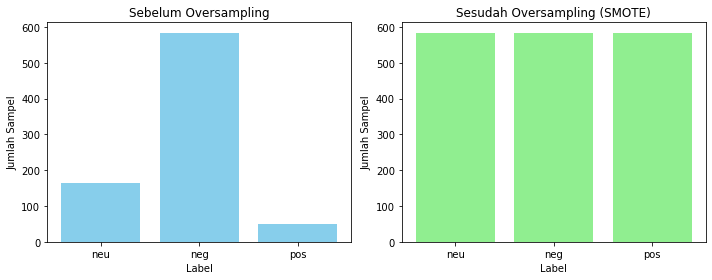

In [334]:
import matplotlib.pyplot as plt
from collections import Counter

# Hitung jumlah label sebelum dan sesudah oversampling
counter_before = Counter(y_train)
counter_after = Counter(y_train_resampled)

# Visualisasi
plt.figure(figsize=(10, 4))

# Sebelum Oversampling
plt.subplot(1, 2, 1)
plt.bar(counter_before.keys(), counter_before.values(), color='skyblue')
plt.title("Sebelum Oversampling")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")

# Sesudah Oversampling
plt.subplot(1, 2, 2)
plt.bar(counter_after.keys(), counter_after.values(), color='lightgreen')
plt.title("Sesudah Oversampling (SMOTE)")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")

plt.tight_layout()
plt.show()

In [335]:
#Latih Model
model = LogisticRegression(max_iter=5000)
model.fit(X_train_resampled, y_train_resampled) 


LogisticRegression(max_iter=5000)

In [336]:
# Evaluasi Model
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.7142857142857143
Laporan klasifikasi:
               precision    recall  f1-score   support

         neg       0.78      0.89      0.83       250
         neu       0.40      0.27      0.32        71
         pos       0.36      0.18      0.24        22

    accuracy                           0.71       343
   macro avg       0.52      0.45      0.46       343
weighted avg       0.67      0.71      0.69       343



In [337]:
sample = ["merdeka jaya abadi"]
sample_vec = vectorizer.transform(sample)

print("Prediksi:", model.predict(sample_vec))

Prediksi: ['neg']


## 4.2  klasifikasi dataset Insetion

In [358]:
X = LabelInset['tweet']
y = LabelInset['label']

print(X)


0        orang orang mikir pajak setahun bayarnya makan...
1        sekolah lu pikir pajak kendaraan lu beli gacoa...
2                                                imaverse 
3        beuh pajak lu ya resto habis komen sosmed sih ...
4                                                wkwkwkkw 
                               ...                        
15553                          respon menteri negara maju 
15554                                       awas dicancel 
15555                                          wkwk panas 
15556                                        tantrum bjir 
15557                                       info barengan 
Name: tweet, Length: 15558, dtype: object


In [359]:
#Vectorisasi dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

In [360]:
# 2. Ambil nama fitur (kata-kata)
feature_names = vectorizer.get_feature_names_out()

# 3. Ubah TF-IDF matrix menjadi DataFrame
dense_matrix = X_vec.todense()
df_tfidf = pd.DataFrame(dense_matrix, columns=feature_names)

# 4. Tambahkan label ke DataFrame TF-IDF
df_tfidf['label'] = y.values

# 5. Filter hanya dokumen berlabel negatif
df_neg = df_tfidf[df_tfidf['label'] == 'pos']

# 6. Hitung rata-rata TF-IDF setiap kata pada label negatif
mean_tfidf_neg = df_neg.drop(columns='label').mean().sort_values(ascending=False)

# 7. Tampilkan 20 kata dengan nilai TF-IDF tertinggi di kelas negatif
top_neg_words = mean_tfidf_neg.head(20)
print(top_neg_words)

ya           0.082151
banget       0.033281
wkwkwk       0.019286
oke          0.018179
nya          0.017912
solusi       0.017761
kalo         0.016412
rakyat       0.014519
kabur        0.013925
kasih        0.013760
yuk          0.013127
orang        0.013106
sih          0.012903
menteri      0.012754
kualitas     0.012087
indonesia    0.012062
negara       0.012054
kerja        0.010893
lucu         0.010883
lu           0.010742
dtype: float64


In [361]:
#Split Data: Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42, stratify=y)

In [362]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.toarray(), y_train)
print(pd.Series(y_train_resampled).value_counts())

C:\Users\shun\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


neg    4614
pos    4614
neu    4614
Name: label, dtype: int64


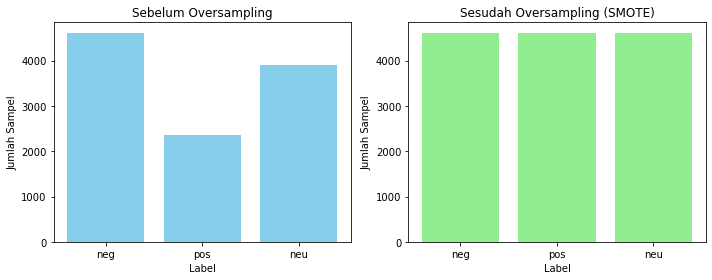

In [258]:
import matplotlib.pyplot as plt
from collections import Counter

# Hitung jumlah label sebelum dan sesudah oversampling
counter_before = Counter(y_train)
counter_after = Counter(y_train_resampled)

# Visualisasi
plt.figure(figsize=(10, 4))

# Sebelum Oversampling
plt.subplot(1, 2, 1)
plt.bar(counter_before.keys(), counter_before.values(), color='skyblue')
plt.title("Sebelum Oversampling")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")

# Sesudah Oversampling
plt.subplot(1, 2, 2)
plt.bar(counter_after.keys(), counter_after.values(), color='lightgreen')
plt.title("Sesudah Oversampling (SMOTE)")
plt.xlabel("Label")
plt.ylabel("Jumlah Sampel")

plt.tight_layout()
plt.show()

In [363]:
#  Latih Model
# Logistic Regression mengukur hubungan antara fitur (X) dan label (y) 
# dengan menghitung probabilitas menggunakan fungsi logistik (sigmoid).
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=5000)

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# model = MultinomialNB()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [364]:
# Uji Model di Data Uji
y_pred = model.predict(X_test)

In [365]:
# Evaluasi Model
from sklearn.metrics import classification_report, accuracy_score

# Data uji (X_test, y_test) adalah representasi dunia nyata.
# Jika kamu oversample juga data uji, maka hasil evaluasimu akan tidak jujur karena kamu sudah "memanipulasi" label di sana.
# Model harus diuji terhadap data yang tidak diubah untuk mengetahui performa sebenarnya.
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred, zero_division=0))


Akurasi: 0.7892030848329049
Laporan klasifikasi:
               precision    recall  f1-score   support

         neg       0.88      0.79      0.83      1977
         neu       0.72      0.78      0.75      1678
         pos       0.74      0.81      0.78      1013

    accuracy                           0.79      4668
   macro avg       0.78      0.79      0.79      4668
weighted avg       0.80      0.79      0.79      4668



In [387]:
sample = ["negara baik makmur"]
sample_vec = vectorizer.transform(sample)

print("Prediksi:", model.predict(sample_vec))

Prediksi: ['pos']


In [378]:
import joblib

joblib.dump(model, "model_sentimen.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']